<a href="https://colab.research.google.com/github/Markan281/misp/blob/main/Zadanie_pracownicy_Zajecia6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Następnym zadaniem ułożenie grafiku pracowników tak aby koszty ich godzin pracy były jak najmniejsze a zarazem, by mieć odpowiednią liczbę pracowników w dany dzień. Ograniczeniem było to, że każdy z pracownikó mógł maksymalnie pracować 3 razy w tygodniu oraz ich preferencje.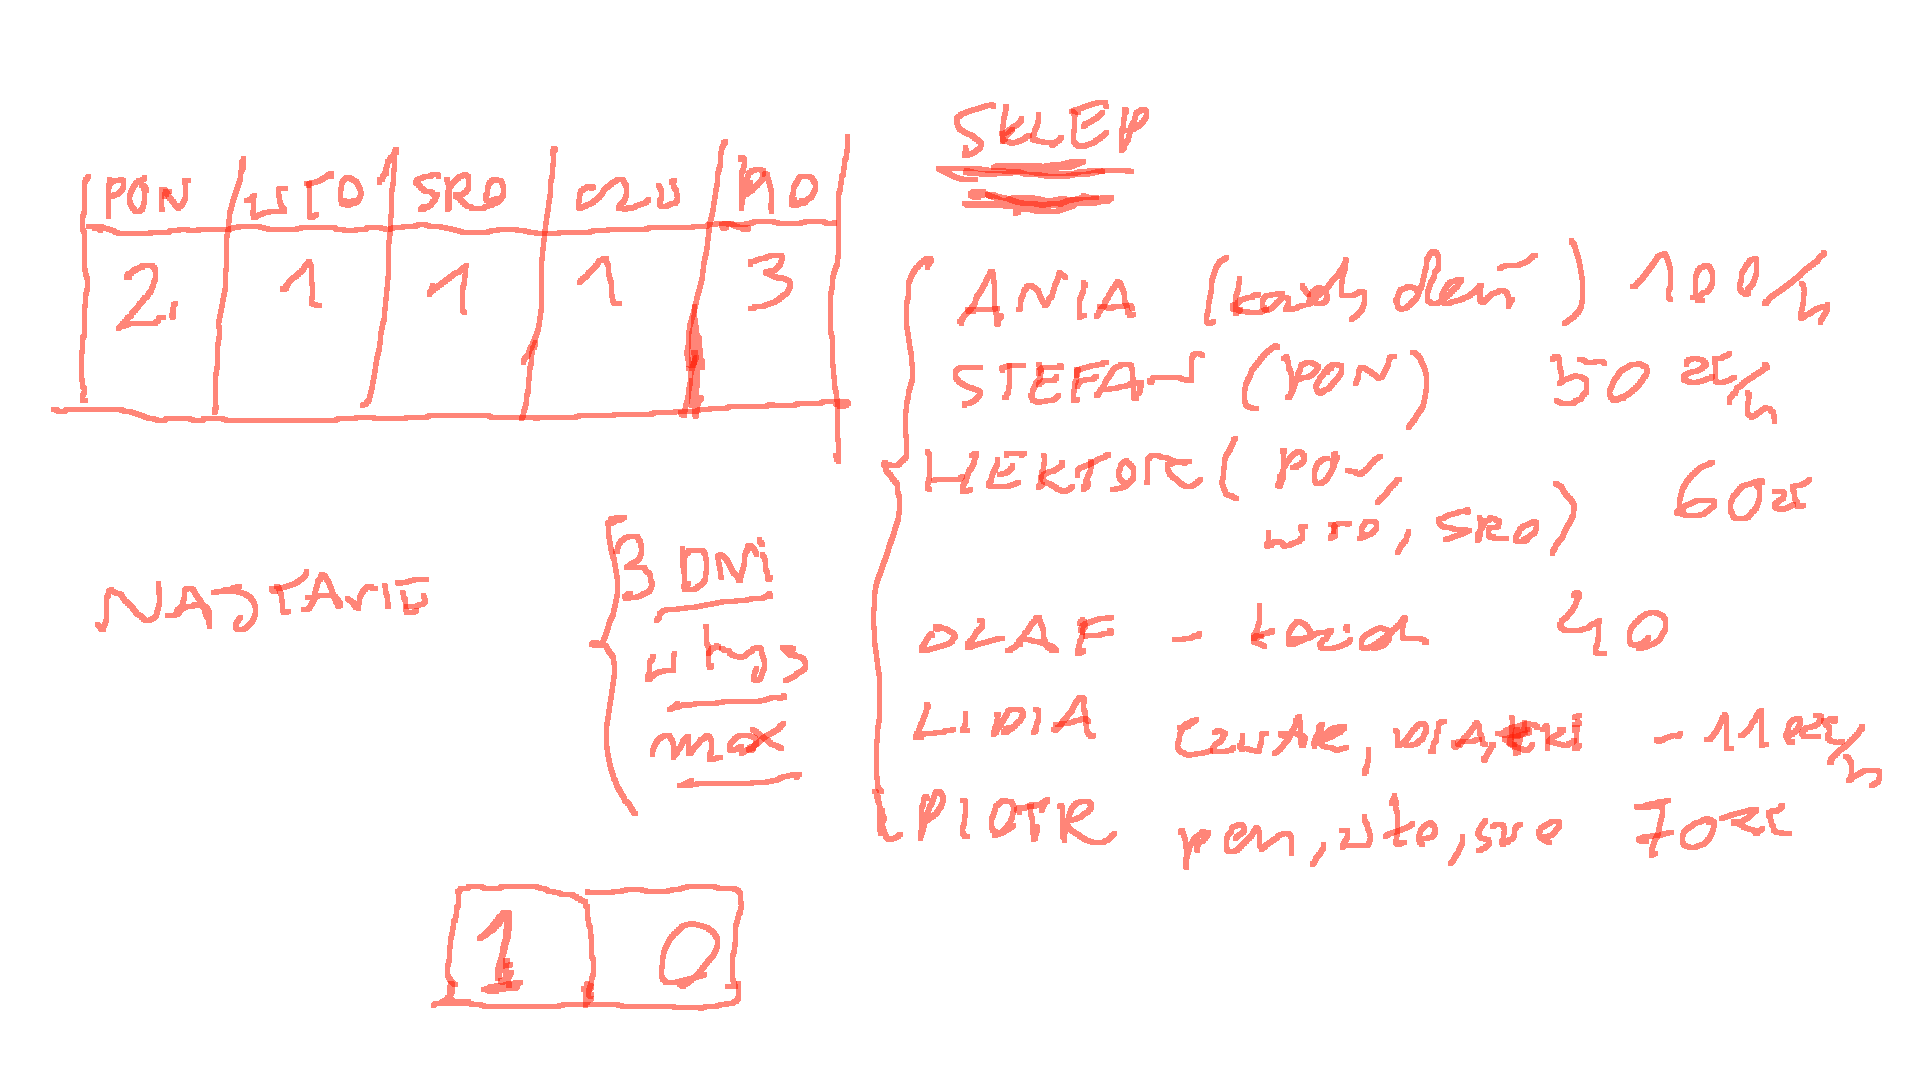

In [1]:
!pip install pulp
import pulp
print(pulp.__version__)
!sudo apt-get install coinor-cbc glpk-utils coinor-clp
from pulp import *

     |████████████████████████████████| 40.6MB 109kB/s 
2.3.1
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  coinor-libcbc3 coinor-libcgl1 coinor-libclp1 coinor-libcoinutils3v5
  coinor-libosi1v5 libamd2 libcolamd2 libglpk40 libsuitesparseconfig5
Suggested packages:
  libiodbc2-dev default-libmysqlclient-dev
The following NEW packages will be installed:
  coinor-cbc coinor-clp coinor-libcbc3 coinor-libcgl1 coinor-libclp1
  coinor-libcoinutils3v5 coinor-libosi1v5 glpk-utils libamd2 libcolamd2
  libglpk40 libsuitesparseconfig5
0 upgraded, 12 newly installed, 0 to remove and 14 not upgraded.
Need to get 3,439 kB of archives.
After this operation, 9,832 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libsuitesparseconfig5 amd64 1:5.1.2-2 [9,044 B]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libamd2 amd64 1:5.1.2-2 [19.5 kB]


In [2]:
Ania_koszt = 100
Stefan_koszt = 50
Hektor_koszt = 60
Olaf_koszt = 40
Lidia_koszt = 110
Piotr_koszt = 70

In [3]:
#zdefiniowanie problemu i zmienne decyzyjne
problem_zmiany = LpProblem("dni", LpMinimize)

Ania_poniedzialek=LpVariable("Ania_poniedzialek",0,1)
Ania_wtorek=LpVariable("Ania_wtorek",0,1)
Ania_sroda=LpVariable("Ania_sroda",0,1)
Ania_czwartek=LpVariable("Ania_czwartek",0,1)
Ania_piatek=LpVariable("Ania_piatek",0,1)
Stefan_poniedzialek=LpVariable("Stefan_poniedzialek",0,1)
Hektor_poniedzialek=LpVariable("Hektor_poniedzialek",0,1)
Hektor_wtorek=LpVariable("Hektor_wtorek",0,1)
Hektor_sroda=LpVariable("Hektor_sroda",0,1)
Olaf_poniedzialek=LpVariable("Olaf_poniedzialek",0,1)
Olaf_wtorek=LpVariable("Olaf_wtorek",0,1)
Olaf_sroda=LpVariable("Olaf_sroda",0,1)
Olaf_czwartek=LpVariable("Olaf_czwartek",0,1)
Olaf_piatek=LpVariable("Olaf_piatek",0,1)
Lidia_czwartek=LpVariable("Lidia_czwartek",0,1)
Lidia_piatek=LpVariable("Lidia_piatek",0,1)
Piotr_poniedzialek=LpVariable("Piotr_poniedzialek",0,1)
Piotr_wtorek=LpVariable("Piotr_wtorek",0,1)
Piotr_sroda=LpVariable("Piotr_sroda",0,1)


In [4]:
#Funkcja do zminimalizowania kosztów zatrudnienia
problem_zmiany += 5*(Ania_koszt*(Ania_poniedzialek+Ania_wtorek+Ania_sroda+Ania_czwartek+Ania_piatek)+Stefan_koszt*(Stefan_poniedzialek)+Hektor_koszt*(Hektor_poniedzialek+Hektor_wtorek+Hektor_sroda)+Olaf_koszt*(Olaf_poniedzialek+Olaf_wtorek+Olaf_sroda+Olaf_czwartek+Olaf_piatek)+Lidia_koszt*(Lidia_czwartek+Lidia_piatek)+Piotr_koszt*(Piotr_poniedzialek+Piotr_wtorek+Piotr_sroda))

# Ograniczenia opisane na początku
problem_zmiany += Ania_poniedzialek+Ania_wtorek+Ania_sroda+Ania_czwartek+Ania_piatek <= 3
problem_zmiany += Olaf_poniedzialek+Olaf_wtorek+Olaf_sroda+Olaf_czwartek+Olaf_piatek <= 3
problem_zmiany += Ania_poniedzialek+Stefan_poniedzialek+Hektor_poniedzialek+Olaf_poniedzialek+Piotr_poniedzialek == 2
problem_zmiany += Ania_wtorek+Hektor_wtorek+Olaf_wtorek+Piotr_wtorek == 1
problem_zmiany += Ania_sroda+Hektor_sroda+Olaf_sroda+Piotr_sroda == 1
problem_zmiany += Ania_czwartek+Lidia_czwartek+Olaf_czwartek == 1
problem_zmiany += Ania_piatek+Lidia_piatek+Olaf_piatek == 3


In [6]:
problem_zmiany.solve()
print(LpStatus[problem_zmiany.status])


Optimal


In [7]:
#Wypisanie wyników 1 jest wtedy gdy pracownik ma przyjść w dany dzień 0 gdy pracownika ma nie być (Piotr jest do zwoleniania)

for variable in problem_zmiany.variables():
    print (variable.name, "=", variable.varValue)

koszt = Ania_koszt*(Ania_poniedzialek.value()+Ania_wtorek.value()+Ania_sroda.value()+Ania_czwartek.value()+Ania_piatek.value())+Hektor_koszt*(Hektor_poniedzialek.value()+Hektor_wtorek.value()+Hektor_sroda.value())+Lidia_koszt*(Lidia_czwartek.value()+Lidia_piatek.value())+Olaf_koszt*(Olaf_poniedzialek.value()+Olaf_wtorek.value()+Olaf_sroda.value()+Olaf_czwartek.value()+Olaf_piatek.value())+Piotr_koszt*(Piotr_poniedzialek.value()+Piotr_wtorek.value()+Piotr_sroda.value())+Stefan_koszt*Stefan_poniedzialek.value()
print("Tygodniowy koszt wynosi = ",koszt* 8," zł")

Ania_czwartek = 0.0
Ania_piatek = 1.0
Ania_poniedzialek = 0.0
Ania_sroda = 0.0
Ania_wtorek = 0.0
Hektor_poniedzialek = 1.0
Hektor_sroda = 1.0
Hektor_wtorek = 0.0
Lidia_czwartek = 0.0
Lidia_piatek = 1.0
Olaf_czwartek = 1.0
Olaf_piatek = 1.0
Olaf_poniedzialek = 0.0
Olaf_sroda = 0.0
Olaf_wtorek = 1.0
Piotr_poniedzialek = 0.0
Piotr_sroda = 0.0
Piotr_wtorek = 0.0
Stefan_poniedzialek = 1.0
Tygodniowy koszt wynosi =  4000.0  zł
